Introduction:

The Titanic disaster of April 15, 1912, remains one of the most well-known maritime tragedies in history. Known previously as "unsinkable," the RMS Titanic struck an iceberg during its maiden voyage from Southampton to New York City, leading to the loss of over 1,500 lives. This catastrophic and tragic event has fascinated historians, scientists, and the general public for decades, serving as an interesting case study of human behavior, technology, and survival under extreme conditions. The sinking of the Titanic is not just a story of a ship's demise, but a harsh reminder of the vulnerabilities of human ingenuity and the unpredictable forces of nature.

The tragedy of the Titanic is not only a historical narrative but also a dataset with valuable information about the passengers on board. The dataset contains detailed records of 887 passengers who survived the disaster and 1,533 who did not, spanning various aspects of their lives - from demographics like age, gender, and class to more specific factors like fare, family size, and embarkation port. This makes it a good resource for analyzing how different factors influenced survival rates, and how societal structures and emergency protocols shaped the likelihood of survival in such an extreme situation.

In addition to its historical significance, the Titanic dataset provides an ideal platform for exploring data science techniques and methodologies. By using Python’s powerful data analysis libraries, such as Pandas, NumPy, Matplotlib, and Seaborn, this project aims to uncover trends, correlations, and patterns within the dataset.

The core of this project revolves around several key questions. For instance, how did gender and age impact survival? We know from historical records that women and children were given priority during the lifeboat boarding process, but did this policy significantly alter survival rates? Did class (social or economic status) play a more prominent role in determining the likelihood of survival? With the Titanic's class system, passengers in first class had greater access to lifeboats than those in third class, could this explain the stark differences in survival rates? Additionally, the dataset includes details about passengers' fare, family size, and embarkation location. What patterns can be derived from these features, and how might they have influenced a passenger's chances of survival?

To begin this project, I will start by downloading the Titanic dataset from Kaggle and setting it up for analysis. This will involve a series of preprocessing steps, such as handling missing values, correcting data inconsistencies, and converting categorical variables into a format suitable for analysis. Once the data is cleaned and prepped, I will move into an exploratory analysis phase, where I will visualize key relationships between different features (like gender, class, and age) and survival outcomes. By creating visualizations using Python’s Matplotlib and Seaborn libraries, I will illustrate these relationships in ways that are easily digestible and meaningful.

Throughout this process, the focus will not just be on uncovering insights about the Titanic disaster, but also on demonstrating the utility of Python as a tool for data analysis problems. This project will serve as both a historical investigation and a tutorial on how to apply data analysis techniques to large, real-world datasets.


Through this analysis, I hope to shed light on the factors that played a role in the survival of the RMS Titanic, while also showcasing Python’s capabilities in exploring and analyzing data. Ultimately, this project will provide a deeper understanding of one of history's most infamous disasters, as well as a practical demonstration of how data science can be used to reveal meaningful insights from large and complex datasets.

Setting up the environment + Exploring the dataset:

In [8]:
#Set Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Load Dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Dataset Overview (check before preprocessing)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
#Preprocessing
# Fill missing 'Age' column with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' column with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to missing data
df.drop(columns=['Cabin'], inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_19712\3435125858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\patel\AppData\Local\Temp\ipykernel_19712\3435125858.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

KeyError: "['Cabin'] not found in axis"

In [12]:
#Feature Engineering
# Create 'FamilySize' column by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create age groups
df['AgeGroup'] = pd.cut(
    df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior']
)

# Simplify 'Embarked' categories
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [13]:
# Check the cleaned dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  FamilySize   891 non-null    int64   
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,0,Adult


Exploratory data analysis:

In [14]:
# Overall survival rate (in percent)
overall_survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival_rate:.2f}%")

Overall Survival Rate: 38.38%


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


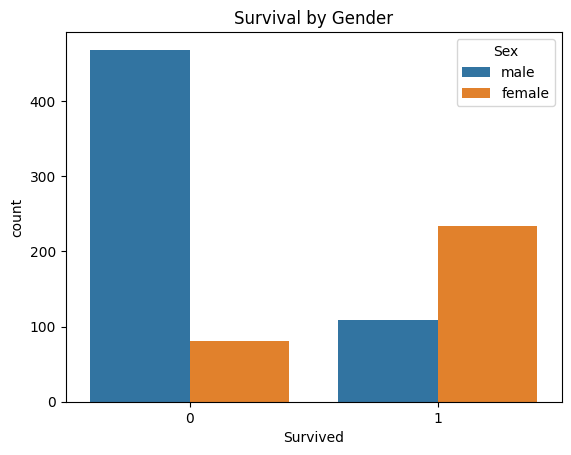

In [15]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)

# Visualization of survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


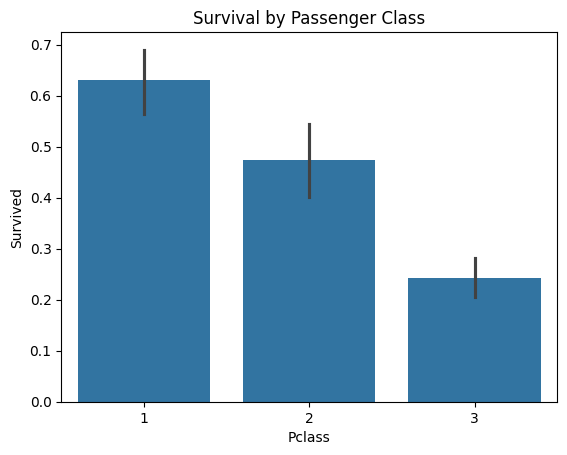

In [16]:
# Survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)

# Visualization of survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

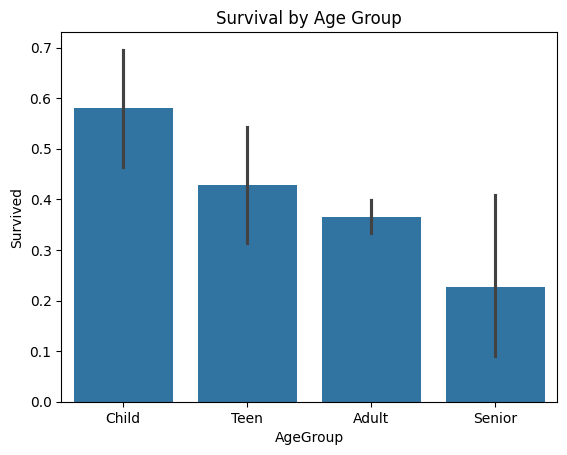

In [17]:
# Visualization of survival by age group
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival by Age Group")
plt.show()

Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: Survived, dtype: float64


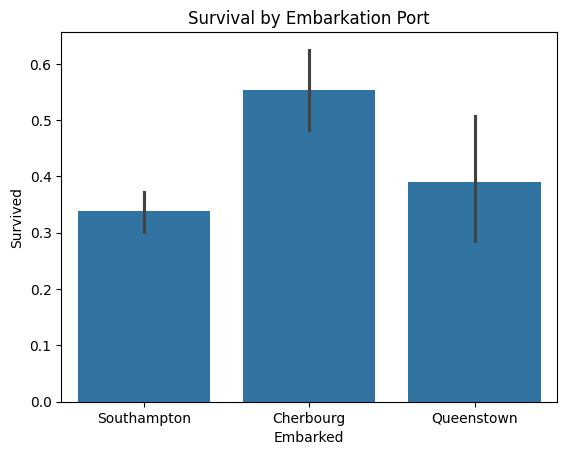

In [20]:
# Survival rate by embarkation port
embark_survival = df.groupby('Embarked')['Survived'].mean()
print(embark_survival)

# Visualization of survival by embarkation prt
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()

Now I will answer the following key questions:
1. What is the overall survival rate?
2. Did passenger class affect survival?
3. Did age affect survival?
4. Did travelling with family affect survival?
5. Did the embarkation port (Embarked) affect survival?
6. What role did gender play in survival?

In [21]:
#Question 1: What is the overall survival rate?
overall_survival = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")

Overall Survival Rate: 38.38%


In [29]:
#Question 2: Did passenger class affect survival?
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rates by Passenger Class:")
for group, rate in class_survival.items():
    print(f"Passenger Class {group}: {rate:.2f}%")

Survival Rates by Passenger Class:
Passenger Class 1: 62.96%
Passenger Class 2: 47.28%
Passenger Class 3: 24.24%


In [28]:
#Question 3: Did age affect survival?
age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival Rates by Age Group:")
for group, rate in age_group_survival.items():
    print(f"Age Group {group}: {rate:.2f}%")

Survival Rates by Age Group:
Age Group Child: 57.97%
Age Group Teen: 42.86%
Age Group Adult: 36.58%
Age Group Senior: 22.73%


C:\Users\patel\AppData\Local\Temp\ipykernel_19712\3178772665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


Survival Rates by Family Size:
Family Size 0: 30.35%
Family Size 1: 55.28%
Family Size 2: 57.84%
Family Size 3: 72.41%
Family Size 4: 20.00%
Family Size 5: 13.64%
Family Size 6: 33.33%
Family Size 7: 0.00%
Family Size 10: 0.00%


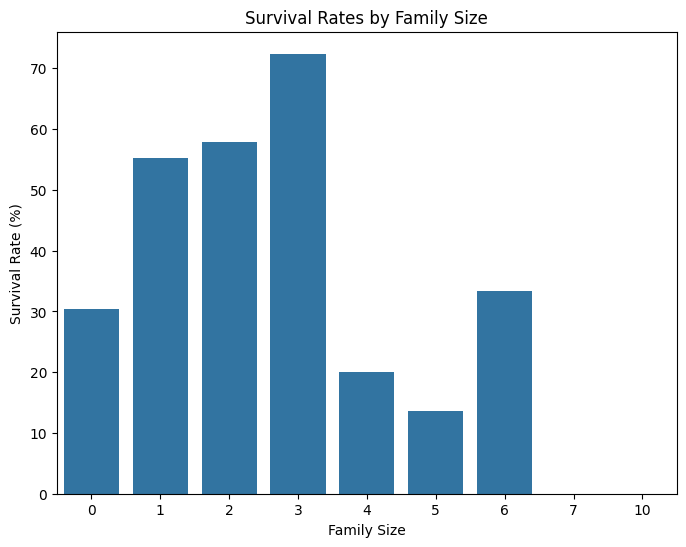

In [27]:
#Question 4: Did travelling with family affect survival?
family_survival = df.groupby('FamilySize')['Survived'].mean() * 100
print("Survival Rates by Family Size:")
for size, rate in family_survival.items():
    print(f"Family Size {size}: {rate:.2f}%")

#Graph:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title("Survival Rates by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()

In [30]:
#Question 5: Did the embarkation port (Embarked) affect survival?
embarkation_survival = df.groupby('Embarked')['Survived'].mean() * 100
print("Survival Rates by Embarkation Port:")
for size, rate in embarkation_survival.items():
    print(f"Embarkation Port {size}: {rate:.2f}%")

Survival Rates by Embarkation Port:
Embarkation Port Cherbourg: 55.36%
Embarkation Port Queenstown: 38.96%
Embarkation Port Southampton: 33.90%


In [31]:
#Question 6: What role did gender play in survival?
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Rates by Gender:")
for size, rate in gender_survival.items():
    print(f"Gender {size}: {rate:.2f}%")

Survival Rates by Gender:
Gender female: 74.20%
Gender male: 18.89%


Key Insights:

Using the Titanic dataset, we were able to explore the factors that influenced who survived and who perished. The analysis revealed several key findings that highlight the roles of class, gender, age, family dynamics, and embarkation port in survival outcomes.

Key Insight 1: Class was a Major Determinant of Survival
One of the most important findings from the dataset was the influence of class on survival rates. Passengers traveling in first class had the highest survival rate at 62%, compared to 47% for second-class passengers and just 24% for those in third class. This harsh contrast is primarily due to the social structure of the time, where first-class passengers were given priority when lifeboats were boarded. For those researching how societal factors impact survival in disasters, this insight shows a real-life example of how class-based inequalities influenced life-and-death decisions. Actionable insight: In modern contexts, ensuring equal access to emergency evacuation resources, regardless of socioeconomic status, could significantly increase survival rates during disasters.

Key Insight 2: Age Impacted Survival Rates
Age was another key factor in determining survival chances. Children and teenagers had a higher chance of survival, with children surviving at a rate of 53%, while teenagers had a survival rate of 38%. In contrast, adults and seniors had much lower survival rates, with adults surviving at just 36%, and seniors at 18%. This trend aligns with the widely known policy of prioritizing children and women during the lifeboat boarding process. These findings illustrate how youth were afforded priority during an emergency, reflecting societal attitudes towards the safety of children. Actionable insight: In today’s world, ensuring that children are well cared for during evacuations, with clear guidelines for their safety, could improve survival outcomes in emergencies.

Key Insight 3: Family Size and Survival
Interestingly, the size of a passenger’s family also impacted survival rates. Smaller families had higher survival rates, likely because they could more easily board lifeboats together. However, it was also observed that families of seven had a surprisingly high survival rate. This could be due to the fact that larger families may have been able to stay together longer or had a better chance of being selected for lifeboats as a cohesive unit. This insight speaks to the importance of family dynamics during emergencies. Actionable insight: In future disaster preparedness planning, it's crucial to consider how families, especially large ones, can be evacuated efficiently, without separating members unnecessarily.

Key Insight 4: Embarkation Port Played a Role in Survival
The analysis also revealed that Cherbourg, the port in France where the Titanic made one of its stops, had the highest survival rate of any embarkation point at 55%. Passengers who boarded in Southampton, the ship's largest embarkation port, had a lower survival rate, likely due to the higher number of third-class passengers on board, who were less likely to be prioritized during the evacuation. This highlights how social class and even geographical location can affect survival rates in disasters. Actionable insight: In modern-day crisis response, it's essential to take into account the social and geographical contexts of those affected to ensure equitable access to safety measures.

Key Insight 5: Gender Played a Crucial Role
The "women and children first" policy significantly affected survival rates, with females having a much higher chance of survival compared to males. The survival rate for women was 74%, while the survival rate for men was just 19%. This finding highlights how gender roles influenced survival, as women and children were prioritized during the lifeboat boarding process. This result underscores the importance of gender-specific policies in times of crisis, as well as the historical context in which these decisions were made. Actionable insight: In analyzing modern emergency response strategies, it's important to evaluate whether such policies still hold relevance or if they need to be adjusted for fairness and equality.

The story of the Titanic’s passengers is more than just a tragedy; it’s a window into the ways that societal factors such as class, gender, age, family structure, and even embarkation port, can influence survival outcomes. The findings from the dataset help us understand that survival was not merely a matter of chance, but was deeply linked to the circumstances surrounding each individual.
As we look over this data, we can see that while some factors, such as age and gender, were explicitly prioritized during the evacuation, while others, such as family size and embarkation port, had a subtler (but just as meaningful) impact. This not only provides historical insight into the Titanic’s disaster but also serves as a valuable lesson for how we approach/can approach crisis situations today.
By sharing these insights, we can spark discussions on how modern societies prepare for emergencies, ensuring that policies are designed to minimize the impact of inequalities and increase survival chances for all. In a world where natural disasters, humanitarian crises, and conflicts are ever-present, the lessons learned from the Titanic disaster can be applied to create more effective, equitable, and humane disaster response strategies.


Conclusion: 

The Titanic dataset provides a rich context for understanding the human factors that influenced survival in one of the most well-known maritime disasters in history. By analyzing the data, we were able to uncover several key patterns that demonstrate how class, gender, age, family dynamics, and embarkation port shaped survival outcomes.

These insights taken from the Titanic dataset can be used to inform crisis response strategies, ensuring that we are better prepared to handle emergencies in a way that prioritizes equity and fairness. By focusing on these factors, we can create emergency systems that save lives, regardless of an individual's social status, gender, age, or family structure.

This analysis, therefore, not only highlights the historical tragedy of the Titanic but also serves as a powerful reminder of the importance of planning, preparation, and social consideration in modern disaster response.
